In [1]:
import pandas as pd

import tqdm

In [2]:
import glob 

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import matplotlib.colors as colors

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
import numpy as np

In [7]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [8]:
matplotlib.rc('font', **font)

## Analysis for low and high benefit

In [9]:
reds, blues = matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Blues")
cmaps = [blues, reds]

In [10]:
columns = [
        "p_1",
        "p_2",
        "p_3",
        "p_4",
        "y",
        "average cooperation rate",
        "average score",
        "t",
        "frequencies"
    ]

In [11]:
expected_dfs = [pd.read_csv(f"../data/clean_memory_one_expected.csv"), 
                pd.read_csv(f"../data/clean_memory_one_b_10_expected.csv")]

In [12]:
last_round_dfs = [pd.read_csv(f"../data/clean_memory_one_last_round.csv"), 
                  pd.read_csv(f"../data/clean_memory_one_b_10_last_round.csv")]

In [13]:
for df in expected_dfs:
    df.columns = columns
    
for df in last_round_dfs:
    df.columns = columns

In [14]:
heatmaps = []
extents = []

for df in expected_dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p_1"], df["p_2"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)
    
    ps, qs = [], []
    for p, q, v in zip(df["p_3"], df["p_4"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [15]:
len(heatmaps)

4

In [16]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

In [17]:
min_, max_

(0.0, 1278298.0)

In [18]:
min_, max_ = 1.0, 1391629.0

In [19]:
titles = ['b=1', 'b=1', 'b=21', 'b=10']

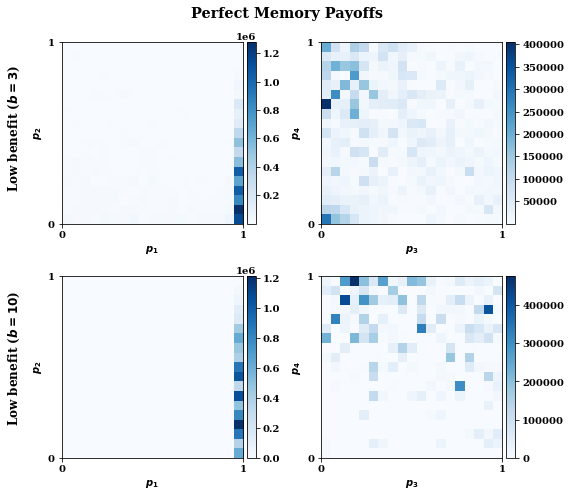

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 7))

for i, heatmap in enumerate(heatmaps):
    
    index = (int(i / 2), (i % 2))

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[0])

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));

axes[(0, 0)].text(-0.3,
              0.2,
              "Low benefit ($b=3$)",
              color="black",
              rotation=90,
              weight='bold',
              fontsize=12,
          )

axes[(1, 0)].text(-0.3,
              0.2,
              "Low benefit ($b=10$)",
              color="black",
              rotation=90,
              weight='bold',
              fontsize=12,
          )

for index in [(0, 0), (1, 0)]:
    axes[index].set_xlabel("$p_1$")
    axes[index].set_ylabel("$p_2$")

for index in [(1, 1), (0, 1)]:
    axes[index].set_xlabel("$p_3$")
    axes[index].set_ylabel("$p_4$")


fig.suptitle("Perfect Memory Payoffs", weight="bold", fontsize="x-large")
fig.tight_layout();

# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

In [21]:
heatmaps = []
extents = []

for df in last_round_dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p_1"], df["p_2"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)
    
    ps, qs = [], []
    for p, q, v in zip(df["p_3"], df["p_4"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

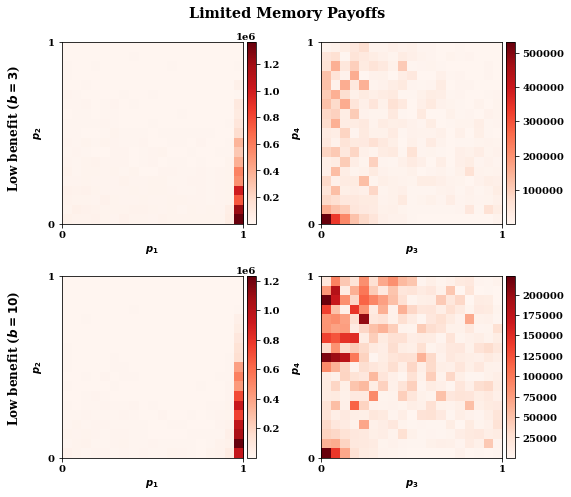

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 7))

for i, heatmap in enumerate(heatmaps):
    
    index = (int(i / 2), (i % 2))

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[1])

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));

axes[(0, 0)].text(-0.3,
              0.2,
              "Low benefit ($b=3$)",
              color="black",
              rotation=90,
              weight='bold',
              fontsize=12,
          )

axes[(1, 0)].text(-0.3,
              0.2,
              "Low benefit ($b=10$)",
              color="black",
              rotation=90,
              weight='bold',
              fontsize=12,
          )

for index in [(0, 0), (1, 0)]:
    axes[index].set_xlabel("$p_1$")
    axes[index].set_ylabel("$p_2$")

for index in [(1, 1), (0, 1)]:
    axes[index].set_xlabel("$p_3$")
    axes[index].set_ylabel("$p_4$")


fig.suptitle("Limited Memory Payoffs", weight="bold", fontsize="x-large")
fig.tight_layout();

# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

In [23]:
height = [sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)) 
          for df in [expected_dfs[0], last_round_dfs[0], expected_dfs[1], last_round_dfs[1]] ]

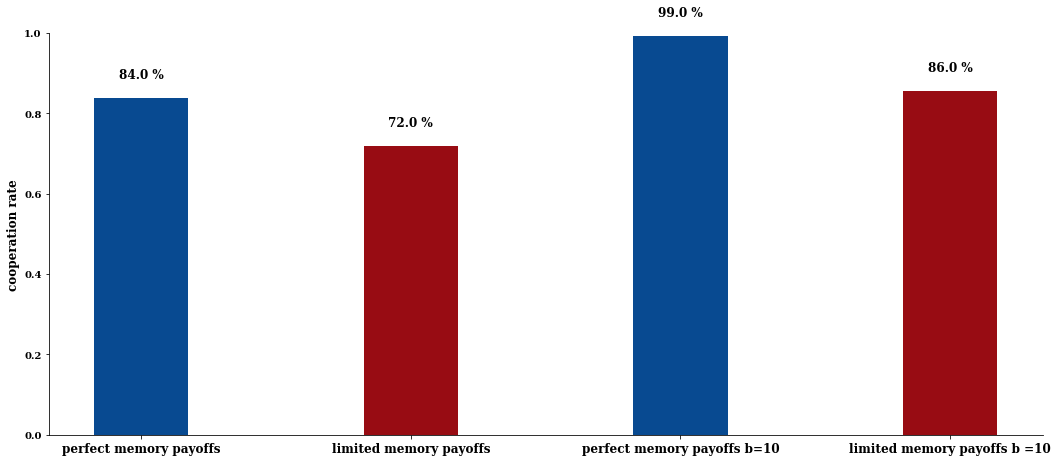

In [24]:
bars = ('perfect memory payoffs', 'limited memory payoffs', 'perfect memory payoffs b=10', 'limited memory payoffs b =10')


fig, axes = plt.subplots(figsize=(15, 6.5));

x_pos = np.arange(len(bars))

axes.bar(x_pos / 5, height, width=0.07,  color=[blues(0.9), reds(0.9), blues(0.9), reds(0.9)])

axes.set_ylabel("cooperation rate", weight="bold", fontsize=12);

axes.set_ylim(0, 1);
axes.set_xticks(x_pos / 5);
axes.set_xticklabels(bars, fontsize=12);

for ax in [axes.spines["right"], axes.spines["top"]]:
    ax.set_visible(False);

for j, pos in enumerate(x_pos / 5):
    axes.text(pos,
          height[j] + 0.05,
          f"{round(height[j], 2) * 100} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=12
      )

plt.tight_layout();

# plt.savefig("../static/_cooperation_rates_expected_and_stochastic_for_donation_game.pdf")

## Analysis over parameters $b$ and $\beta$

### Benefit analysis

In [76]:
import re

start = 'b_'

In [77]:
csv_files = [f'../data/clean_memory_one_expected_b_{b}.csv' for b in range(2, 11)]
csv_files_lr = [f'../data/clean_memory_one_last_round_b_{b}.csv' for b in range(2, 11)]

In [78]:
end = '.csv'

dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs.append(df)

In [79]:
end = '.csv'
dfs_stoch = []

for file in csv_files_lr:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_stoch.append(df)

In [80]:
cooperation_rates = []
cooperation_rates_expected = []

for exp, stoch in zip(dfs, dfs_stoch):
    
    cooperation_rates_expected.append(
        sum(exp['average cooperation rate'] * (exp['frequencies'] / sum(exp['frequencies'])))
    )
    cooperation_rates.append(
        sum(stoch['average cooperation rate'] * (stoch['frequencies'] / sum(stoch['frequencies'])))
    )

In [81]:
%%capture

generosity = []
generosity_stoch = []

for exp, stoch in zip(dfs, dfs_stoch):


    _, bins, _ = plt.hist(exp['p_1'], bins=19);
    generosity.append(np.mean(exp[exp['p_1'] >= bins[-2]][['p_2', 'p_4']].unstack()))
    
    _, bins, _ = plt.hist(stoch['p_1'], bins=19);
    generosity_stoch.append(np.mean(stoch[stoch['p_1'] >= bins[-2]][['p_2', 'p_4']].unstack()))
    

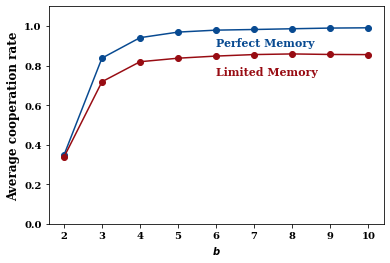

In [82]:
fig, axes = plt.subplots()

axes.plot(range(2, 11), cooperation_rates_expected, "-o", color=blues(0.9), label="expected");
axes.plot(range(2, 11), cooperation_rates, "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average cooperation rate', weight="bold", fontsize=12);
axes.set_xlabel('$b$', weight="bold");
axes.set_ylim(0, 1.1);

axes.text(6, .9, "Perfect Memory", fontsize=11, color=blues(.9))
axes.text(6, .75, "Limited Memory", fontsize=11, color=reds(.9));

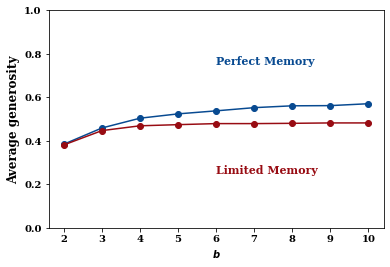

In [83]:
fig, axes = plt.subplots()

axes.plot(range(2, 11), generosity, "-o", color=blues(0.9), label="expected");
axes.plot(range(2, 11), generosity_stoch, "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average generosity', weight="bold", fontsize=12);
axes.set_xlabel('$b$', weight="bold");
axes.set_ylim(0, 1);

axes.text(6, .75, "Perfect Memory", fontsize=11, color=blues(.9));
axes.text(6, .25, "Limited Memory", fontsize=11, color=reds(.9));


### Strength of selection analysis 

In [62]:
betas = [0.01, 0.1, 1, 10, 100]
start = 'beta_'

In [63]:
csv_files = [f'../data/clean_memory_one_expected_beta_{beta}.csv' for beta in betas]
csv_files_lr = [f'../data/clean_memory_one_last_round_beta_{beta}.csv' for beta in betas]

In [64]:
end = ".csv"

dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs.append(df)

In [65]:
dfs_stoch = []

for file in csv_files_lr:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_stoch.append(df)

In [66]:
cooperation_rates = []
cooperation_rates_expected = []

for exp, stoch in zip(dfs, dfs_stoch):
    
    cooperation_rates_expected.append(
        sum(exp['average cooperation rate'] * (exp['frequencies'] / sum(exp['frequencies'])))
    )
    cooperation_rates.append(
        sum(stoch['average cooperation rate'] * (stoch['frequencies'] / sum(stoch['frequencies'])))
    )

In [67]:
%%capture

generosity = []
generosity_stoch = []

for exp, stoch in zip(dfs, dfs_stoch):


    _, bins, _ = plt.hist(exp['p_1'], bins=19);
    generosity.append(np.mean(exp[exp['p_1'] >= bins[-2]][['p_2', 'p_4']].unstack()))
    
    _, bins, _ = plt.hist(stoch['p_1'], bins=19);
    generosity_stoch.append(np.mean(stoch[stoch['p_1'] >= bins[-2]][['p_2', 'p_4']].unstack()))
    

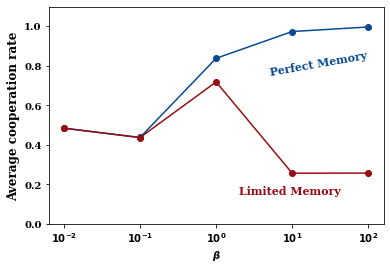

In [70]:
fig, axes = plt.subplots()

axes.plot(range(1, 6), cooperation_rates_expected, "-o", color=blues(0.9));
axes.plot(range(1, 6), cooperation_rates, "-o", color=reds(0.9));

axes.set_ylabel('Average cooperation rate', weight="bold", fontsize=12);
axes.set_xlabel(r'$\beta$', weight="bold");

axes.set_xticks([1, 2, 3, 4, 5]);
axes.set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

axes.set_ylim(0, 1.1);
axes.text(3.7, .75, "Perfect Memory", fontsize=11, color=blues(.9), rotation=10)
axes.text(3.3, .15, "Limited Memory", fontsize=11, color=reds(.9), rotation=0);

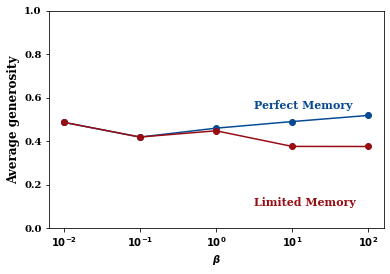

In [69]:
fig, axes = plt.subplots()

axes.plot(range(1, 6), generosity, "-o", color=blues(0.9), label="expected");
axes.plot(range(1, 6), generosity_stoch, "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average generosity', weight="bold", fontsize=12);
axes.set_xlabel(r'$\beta$', weight="bold");
axes.set_ylim(0, 1);

axes.text(3.5, .55, "Perfect Memory", fontsize=11, color=blues(.9))
axes.text(3.5, .1, "Limited Memory", fontsize=11, color=reds(.9))

axes.set_xticks([1, 2, 3, 4, 5]);
axes.set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);
